# 01. PyTorch Workflows

Resource notebook: https://www.learnpytorch.io/01_pytorch_workflow/

In [150]:
import torch
from torch import nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.7.1


## Data preparing and loading

In [151]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [152]:
len(X), len(y)

(50, 50)

### Spliting data into train and test set

In [153]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [154]:
X_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [155]:
def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14});
    plt.show()

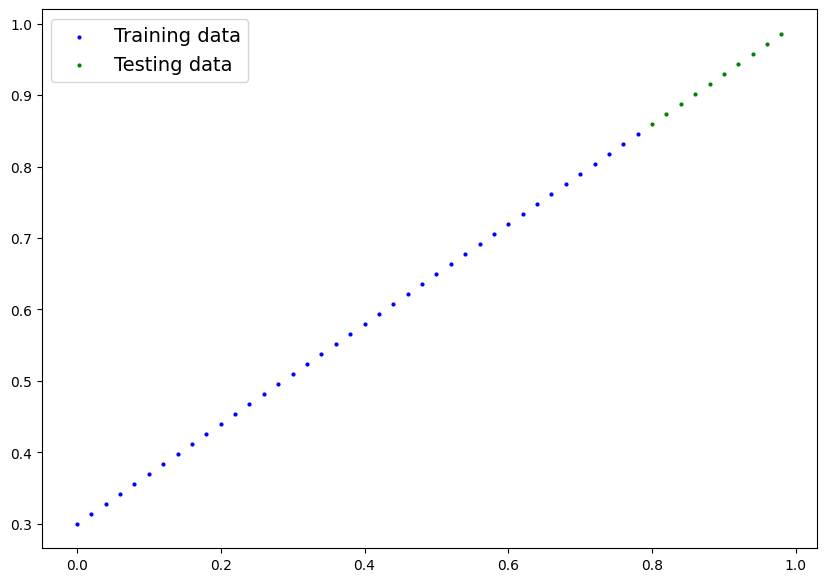

In [156]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building a model

In [157]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [158]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [159]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [160]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [161]:
weight, bias

(0.7, 0.3)

In [162]:
%%time
with torch.no_grad():
    y_preds = model_0(X_test)

y_preds, y_test

CPU times: user 305 μs, sys: 178 μs, total: 483 μs
Wall time: 334 μs


(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [163]:
%%time
with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds, y_test

CPU times: user 521 μs, sys: 571 μs, total: 1.09 ms
Wall time: 752 μs


(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

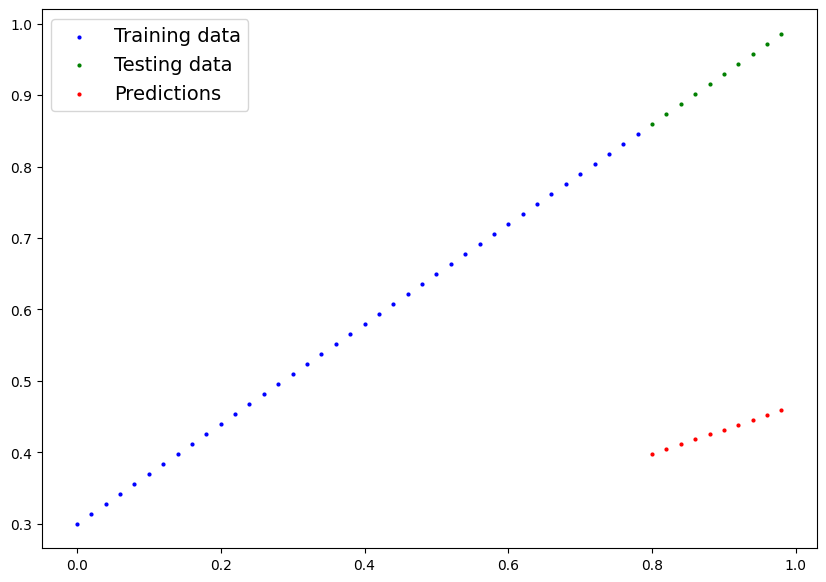

In [164]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [165]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [166]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [173]:
epochs = 100

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()

    model_0.eval()
    
    print(model_0.state_dict())


Loss: 0.1976713389158249
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Loss: 0.1746293157339096
OrderedDict([('weights', tensor([0.3874])), ('bias', tensor([0.2588]))])
Loss: 0.16310831904411316
OrderedDict([('weights', tensor([0.3913])), ('bias', tensor([0.2688]))])
Loss: 0.1515873372554779
OrderedDict([('weights', tensor([0.3952])), ('bias', tensor([0.2788]))])
Loss: 0.14006635546684265
OrderedDict([('weights', tensor([0.3991])), ('bias', tensor([0.2888]))])
Loss: 0.1285453587770462
OrderedDict([('weights', tensor([0.4030])), ('bias', tensor([0.2988]))])
Loss: 0.11702437698841095
OrderedDict([('weights', tensor([0.4069])), ('bias', tensor([0.3088]))])
Loss: 0.1060912162065506
OrderedDict([('weights', tensor([0.4108])), ('bias', tensor([0.3178]))])
Loss: 0.09681284427642822
OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3258]))])
Loss: 0.0890872

In [174]:
with torch.inference_mode():
    y_pred = model_0(X_test)

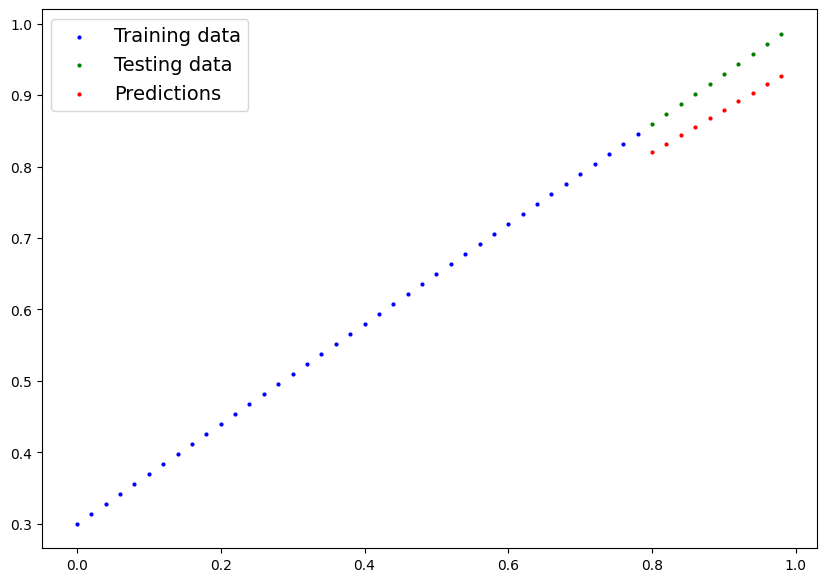

In [175]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)